Librerías necesarias:

In [2]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import csv
#from scipy import stats
import seaborn as sns
import collections
from tqdm import tqdm
import keras.backend as K
from PIL import Image

Leemos el directorio y contamos cuántas imágenes hay

In [4]:
# APTOS 2015
directoris2 = []
contador2 = []
fitxers2 = []
path_img2 = []

#Devuelve el path a las imágenes (path_img), el nombre de las imágenes (fitxers) y la cantidad (contador)
for dirname2, _, filenames2 in os.walk('/Volumes/Lorena/APTOS/archive/rescaled_train_896/rescaled_train_896',followlinks=False):
    directoris2.append(os.path.join(dirname2))
    for i in filenames2:
        if not '._' in i:
            fitxers2.append(i)
            path_img2.append(dirname2+"/"+i)
    contador2.append(dirname2+': CONTÉ '+str(len(fitxers2)) + ' FOTOS')

In [5]:
contador2

['/Volumes/Lorena/APTOS/archive/rescaled_train_896/rescaled_train_896: CONTÉ 35126 FOTOS']

In [4]:
# Para mirar si coinciden el nombre de los ficheros con los reales
#df = pd.DataFrame(fitxers)
#df.to_csv(r'noms_train_images2.csv')

In [6]:
# Cargamos el train.csv de APTOS2015
csv_train2 = open('/Volumes/Lorena/APTOS/archive/trainLabels.csv')
csvreader2 = csv.reader(csv_train2)
rows2 = []
for row in csvreader2:
        rows2.append(row)

In [7]:
#Observamos las primeras líneas del fichero csv
rows2[0:10]

[['image;level'],
 ['10_left;0'],
 ['10_right;0'],
 ['13_left;0'],
 ['13_right;0'],
 ['15_left;1'],
 ['15_right;2'],
 ['16_left;4'],
 ['16_right;4'],
 ['17_left;0']]

In [8]:
path_img_all = path_img2
rows_all = rows2
print(f'Total of images: {len(path_img_all)}')
print(f'Total of rows: {len(rows_all)}')

Total of images: 35126
Total of rows: 35127


Observamos que hay algunos nombres de imagen en el fichero de csv train con las etiquetas que no coinciden con el nombre del fichero realmente, por lo que algunas imágenes no sabremos qué etiqueta tienen. 
Además cuando leemos la carpeta de imágenes nos duplica los ficheros y nos cuenta como el doble de imágenes. 

Creamos los sets de imágens y etiquetas

In [9]:
data = []
labels = []
nombres_imgs = []
items = []
# recorremos los paths de las imágenes y de las filas del csv, buscamos el nombre de la imágen en el
#csv y creamos dos sets de datos con las imágenes y la etiqueta correspondiente en la misma posición
for imagePath in path_img_all:
    #print(imagePath)
    if not '._' in imagePath:
        for row in rows_all:
            item = imagePath.split(os.path.sep)[-1]
            if item[0:item.find('.')] == row[0][0:row[0].find(';')] and item[1]!='_' :
                # leemos la imagen
                items.append(item)
                image = cv2.imread(imagePath)
                image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)
                # creamos los arrays de imágenes y etiquetas
                nombres_imgs.append(imagePath)
                data.append(image)
                labels.append(row[0][(row[0].find(';'))+1:])

In [ ]:
data = []
labels = []
# recorremos los paths de las imágenes y de las filas del csv, buscamos el nombre de la imágen en el
#csv y creamos dos sets de datos con las imágenes y la etiqueta correspondiente en la misma posición
for imagePath in path_img:
    #print(imagePath)
    if not '._' in imagePath:
        for row in rows:
            item = imagePath.split(os.path.sep)[-1]
            if item[0:item.find('.')] in row[0] and item[1]!='_' :
                # leemos la imagen
                image = cv2.imread(imagePath)
                #image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_LINEAR)
                # creamos los arrays de imágenes y etiquetas
                data.append(image)
                labels.append(row[0][(row[0].find(';'))+1:])

Mostramos una imagen de cada etiqueta

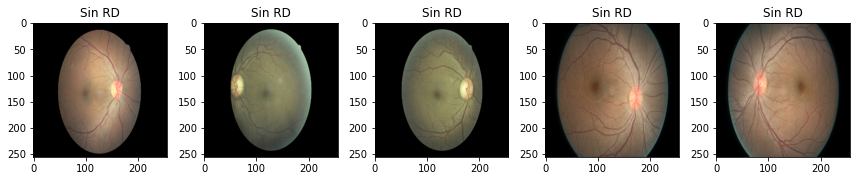

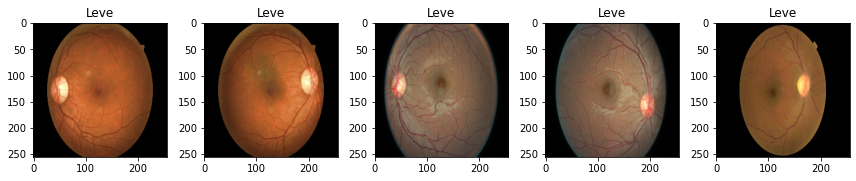

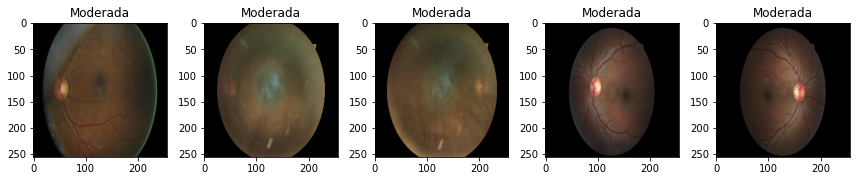

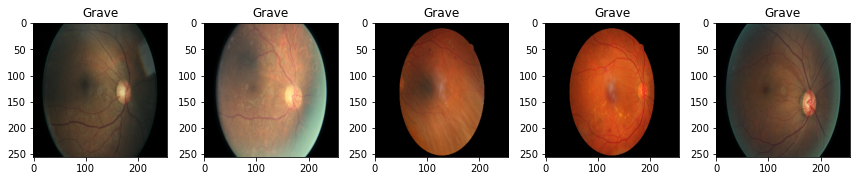

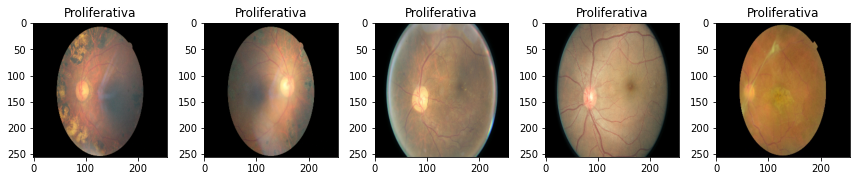

In [10]:
ax, fig = plt.subplots(5, figsize=(12,5))
id_0 = 0
for i in range(5):
    plt.subplot(1, 5, i+1)
    id_0 = (labels.index('0', id_0+1))
    plt.imshow(cv2.cvtColor(data[id_0], cv2.COLOR_BGR2RGB))
    plt.title('Sin RD')
plt.tight_layout()    

ax, fig = plt.subplots(5, figsize=(12,5))
id_1 = 0
for i in range(5):
    plt.subplot(1, 5, i+1)
    id_1 = (labels.index('1', id_1+1))
    plt.imshow(cv2.cvtColor(data[id_1], cv2.COLOR_BGR2RGB))
    plt.title('Leve')
plt.tight_layout()

ax, fig = plt.subplots(5, figsize=(12,5))
id_2 = 0
for i in range(5):
    plt.subplot(1, 5, i+1)
    id_2 = (labels.index('2', id_2+1))
    plt.imshow(cv2.cvtColor(data[id_2], cv2.COLOR_BGR2RGB))
    plt.title('Moderada')
plt.tight_layout()    

ax, fig = plt.subplots(5, figsize=(12,5))
id_3 = 0
for i in range(5):
    plt.subplot(1, 5, i+1)
    id_3 = (labels.index('3', id_3+1))
    plt.imshow(cv2.cvtColor(data[id_3], cv2.COLOR_BGR2RGB))
    plt.title('Grave')
plt.tight_layout()    

ax, fig = plt.subplots(5, figsize=(12,5))
id_4 = 0
for i in range(5):
    plt.subplot(1, 5, i+1)
    id_4 = (labels.index('4', id_4+1))
    plt.imshow(cv2.cvtColor(data[id_4], cv2.COLOR_BGR2RGB))
    plt.title('Proliferativa')
plt.tight_layout()    



(-0.5, 255.5, 255.5, -0.5)

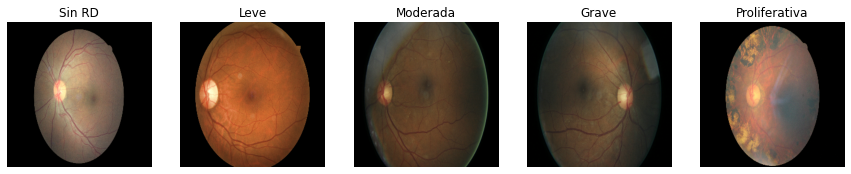

In [11]:
#plt.figure(figsize=[15, 15])
f, axarr = plt.subplots(1,5)
f.set_figheight(15)
f.set_figwidth(15)
id_0 = labels.index('0')
id_1 = labels.index('1')
id_2 = labels.index('2')
id_3 = labels.index('3')
id_4 = labels.index('4')
axarr[0].imshow(cv2.cvtColor(data[id_0], cv2.COLOR_BGR2RGB))
axarr[0].title.set_text('Sin RD')
axarr[0].axis('off')
axarr[1].imshow(cv2.cvtColor(data[id_1], cv2.COLOR_BGR2RGB))
axarr[1].title.set_text('Leve')
axarr[1].axis('off')
axarr[2].imshow(cv2.cvtColor(data[id_2], cv2.COLOR_BGR2RGB))
axarr[2].title.set_text('Moderada')
axarr[2].axis('off')
axarr[3].imshow(cv2.cvtColor(data[id_3], cv2.COLOR_BGR2RGB))
axarr[3].title.set_text('Grave')
axarr[3].axis('off')
axarr[4].imshow(cv2.cvtColor(data[id_4], cv2.COLOR_BGR2RGB))
axarr[4].title.set_text('Proliferativa')
axarr[4].axis('off')

In [12]:
#Función que recorta los bordes de las imágenes 
#(inspirado en  https://www.kaggle.com/ratthachat/aptos-updated-preprocessing-ben-s-cropping)
def crop_border(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    mask = gray_img > 7 
    check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0] 
    #print(check_shape)
    if (check_shape == 0):
        return img
    else:
        img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
        img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
        img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
        img = np.stack([img1,img2,img3],axis=-1)
    return img


Provamos con tres tipos de filtros diferentes (equalización del histograma, aplicación de un filtro gausiano y la extracción del canal verde con CLAHE)

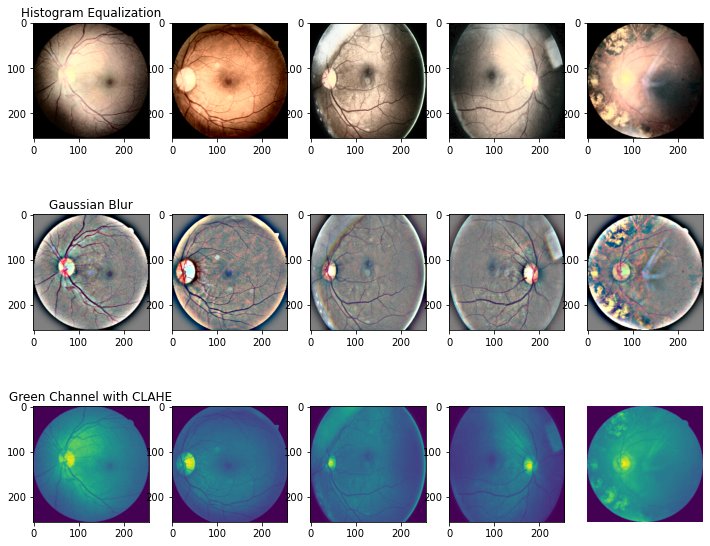

In [13]:
images_example = [data[id_0],data[id_1],data[id_2],data[id_3],data[id_4]]
width = 256
height = 256
equ_images = []
gaus_images = []
green = []
for i in images_example:
    image = i
    image = crop_border(image)
    image = cv2.resize(image, (width, height))
    
    #Applying histogram equalization
    img_to_yuv = cv2.cvtColor(image,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    
    # Applying GaussianBlur
    blurred = cv2.blur(image, ksize=(int(width / 6), int(height / 6)))
    image_blur = cv2.addWeighted(image, 4, cv2.GaussianBlur( image , (0,0) , 10) ,-4 ,128)
    
    #Extract green channel
    green_channel = image[:,:,1]
    clipLimit = 2.0
    tileGridSize = (8,8)
    clahe=cv2.createCLAHE(clipLimit = clipLimit, tileGridSize = tileGridSize)
    cla=clahe.apply(green_channel)
    #     cla=clahe.apply(cla)
    img=cv2.merge((cla,cla,cla))
    
    equ_images.append(hist_equalization_result)
    gaus_images.append(image_blur)
    green.append(green_channel)

f, axarr = plt.subplots(3,5,figsize=(12, 10))
plt.axis('off')
axarr[0,0].title.set_text('Histogram Equalization')
axarr[0,0].imshow(cv2.cvtColor(equ_images[0], cv2.COLOR_BGR2RGB))
axarr[0,1].imshow(cv2.cvtColor(equ_images[1], cv2.COLOR_BGR2RGB))
axarr[0,2].imshow(cv2.cvtColor(equ_images[2], cv2.COLOR_BGR2RGB))
axarr[0,3].imshow(cv2.cvtColor(equ_images[3], cv2.COLOR_BGR2RGB))
axarr[0,4].imshow(cv2.cvtColor(equ_images[4], cv2.COLOR_BGR2RGB))
axarr[1,0].title.set_text('Gaussian Blur')
axarr[1,0].imshow(cv2.cvtColor(gaus_images[0], cv2.COLOR_BGR2RGB))
axarr[1,1].imshow(cv2.cvtColor(gaus_images[1], cv2.COLOR_BGR2RGB))
axarr[1,2].imshow(cv2.cvtColor(gaus_images[2], cv2.COLOR_BGR2RGB))
axarr[1,3].imshow(cv2.cvtColor(gaus_images[3], cv2.COLOR_BGR2RGB))
axarr[1,4].imshow(cv2.cvtColor(gaus_images[4], cv2.COLOR_BGR2RGB))
axarr[2,0].title.set_text('Green Channel with CLAHE')
axarr[2,0].imshow(green[0])
axarr[2,1].imshow(green[1])
axarr[2,2].imshow(green[2])
axarr[2,3].imshow(green[3])
axarr[2,4].imshow(green[4])

Como vemos que el con el filtro gausiano es con el que obtenemos un resalte mayor de las anomalías y los vasos de la retina, aplicamos este a todo el set de datos

In [25]:
processed_data = []

for img in data:
    image = img
    image = crop_border(image)
            
    image = cv2.resize(image, (256, 256))
    
    # Applying GaussianBlur
    blurred = cv2.blur(image, ksize=(int(256 / 6), int(256 / 6)))
    image_blur = cv2.addWeighted(image, 4, cv2.GaussianBlur( image , (0,0) , 10) ,-4 ,128)
    
    processed_data.append(image_blur)

Mostramos los histogramas de 10 imágenes antes y después del procesado

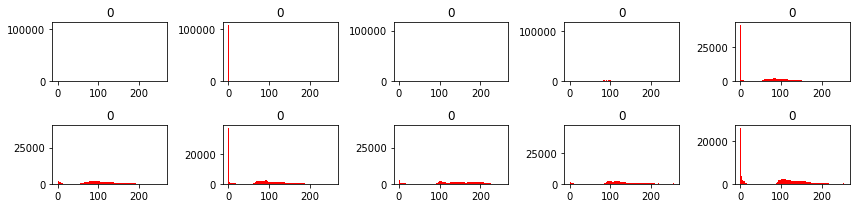

In [26]:
ax, fig=plt.subplots(2*5,figsize=(12, 3))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.hist(data[i].flatten(),256,[0,256],color='r')
    plt.title(labels[i])

plt.tight_layout()    

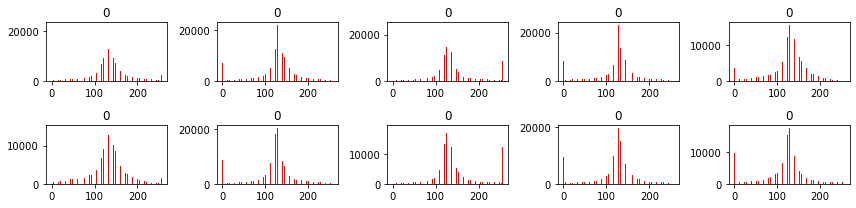

In [27]:
ax, fig=plt.subplots(2*5,figsize=(12, 3))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.hist(processed_data[i].flatten(),256,[0,256],color='r')
    plt.title(labels[i])
    
plt.tight_layout()    

Miramos la cantidad de imágenes que hay con cada etiqueta

0    25810
2     5292
1     2443
3      873
4      708
Name: 0, dtype: int64


<AxesSubplot:ylabel='0'>

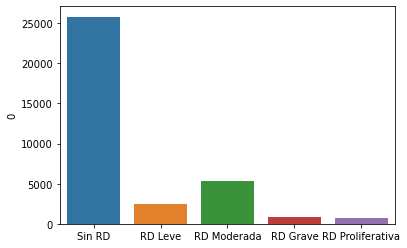

In [23]:
#ANALIZANDO DATOS
names = ['Sin RD', 'RD Leve', 'RD Moderada', 'RD Grave', 'RD Proliferativa']
labs = pd.DataFrame(labels)
print(labs[0].value_counts())
sns.barplot(x=names,y=labs[0].value_counts().sort_index())

In [24]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))


{'0': 25810, '1': 2443, '2': 5292, '3': 873, '4': 708}